### Data Pre-Processing - Kaggle Dataset 
- according to Bhatt et al. (Source: https://www.mdpi.com/1999-4893/16/2/88)

In [1]:
# Import necessary libraries
import pandas as pd

# define the filepath where the data/csv is stored
file_path = 'D:\DigiEcon\MasterThesis\Technical Implementation\DataSets\Dataset1_CardiovascularDisease_Kaggle\cardio_train.csv'

# Read the csv file
df = pd.read_csv(file_path, sep=';')

# Display the first 5 rows to check it loaded correctly
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
#Inspect structure = 70000 observations and 13 columns including the target variable
print(df.shape)

(70000, 13)


In [3]:
#check how the data is stored; weight is a float, the other variables integers 
print(df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [4]:
# General overview and check for missing values = no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# check again for missing values with is null = none missing values 
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# in the representation of the head function we see the 12 variables, the first being an ID and the following 11 the features comprising the patient health data 
# but we will drop the id number as we have the index number of the dataframe anyways and additionally we need to fix the age columns since it is given in days

# Drop the 'id' column
df = df.drop(columns=['id'])

# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

#the gender attribute was kept in the original encoding with female = 1 and male = 2

# Show the cleaned data
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#to get a general overview of the data 
df.describe().round(2)

#that gives us a good overview which variables we need to insepct for outliers: height, weight, ap_hi, ap_lo

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,52.84,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,6.77,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,29.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,48.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,53.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,58.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,64.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


In [8]:
columns = ['ap_hi', 'ap_lo', 'weight', 'height']
for col in columns:
    lower = df[col].quantile(0.025)
    upper = df[col].quantile(0.975)
    df = df[(df[col] >= lower) & (df[col] <= upper)]
print(f"Rows after quantile outlier removal: {len(df)}")  # ~60752

Rows after quantile outlier removal: 60752


In [9]:
# 4. Drop NaNs (in case)
df = df.dropna()

# 5. Drop duplicates
df = df.drop_duplicates()

print(f"Rows after fine-tuned filtering: {len(df)}")

Rows after fine-tuned filtering: 57557


In [10]:
#check overview again 
df.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,57557.00,57557.00,57557.00,57557.00,57557.00,57557.00,57557.00,57557.00,57557.00,57557.00,57557.0,57557.00
mean,52.89,1.36,164.55,73.85,126.48,81.24,1.37,1.23,0.09,0.06,0.8,0.51
std,6.79,0.48,6.93,11.82,14.56,8.49,0.68,0.58,0.29,0.23,0.4,0.50
min,29.00,1.00,150.00,52.00,100.00,60.00,1.00,1.00,0.00,0.00,0.0,0.00
25%,48.00,1.00,160.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00
50%,54.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,1.00
75%,58.00,2.00,170.00,81.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.00
max,64.00,2.00,180.00,107.00,170.00,100.00,3.00,3.00,1.00,1.00,1.0,1.00


### Proceed with Preprocessing steps according to Bhatt et al.

In [11]:
# Keep only rows with age in expected range
df = df[(df['age'] >= 30) & (df['age'] < 65)]

# Bin in 5-year intervals
age_bins = list(range(30, 70, 5))  # 30-35 up to 65
df['age'] = pd.cut(df['age'], bins=age_bins, right=False, labels=range(7)).astype(int)

# calculate BMI and bin into categories
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

# Define BMI bins
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
df['bmiclass'] = pd.cut(df['bmi'], bins=bmi_bins, labels=range(6), right=False).astype(int)

# Calculate MAP 
df['MAP'] = (2 * df['ap_lo'] + df['ap_hi']) / 3

# Filter rows within the valid MAP range 
df = df[(df['MAP'] >= 70) & (df['MAP'] < 120)]

# Define bin edges and category labels
map_bins = [70, 80, 90, 100, 110, 120]
map_labels = [1, 2, 3, 4, 5]  # Categories 1–5
df['MAP'] = pd.cut(df['MAP'], bins=map_bins, labels=map_labels, right=False).astype(int)

# Preview updated DataFrame
print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0    4       2     168    62.0    110     80            1     1      0     0   
1    5       1     156    85.0    140     90            3     1      0     0   
2    4       1     165    64.0    130     70            3     1      0     0   
3    3       2     169    82.0    150    100            1     1      0     0   
4    3       1     156    56.0    100     60            1     1      0     0   

   active  cardio  height_m        bmi  bmiclass  MAP  
0       1       0      1.68  21.967120         1    3  
1       1       1      1.56  34.927679         4    4  
2       0       1      1.65  23.507805         1    3  
3       1       1      1.69  28.710479         2    5  
4       0       0      1.56  23.011177         1    1  


In [12]:
# Select only the columns used in the model
model_df = df[['gender', 'age', 'bmiclass', 'MAP', 'cholesterol',
               'gluc', 'smoke', 'alco', 'active', 'cardio']]

# Preview the DataFrame
print(model_df.head())


   gender  age  bmiclass  MAP  cholesterol  gluc  smoke  alco  active  cardio
0       2    4         1    3            1     1      0     0       1       0
1       1    5         4    4            3     1      0     0       1       1
2       1    4         1    3            3     1      0     0       0       1
3       2    3         2    5            1     1      0     0       1       1
4       1    3         1    1            1     1      0     0       0       0


In [13]:
#check overview again 
model_df.describe().round(2)

,gender,age,bmiclass,MAP,cholesterol,gluc,smoke,alco,active,cardio
count,56278.00,56278.00,56278.00,56278.00,56278.00,56278.00,56278.00,56278.00,56278.0,56278.0
mean,1.35,4.16,1.98,3.21,1.37,1.23,0.09,0.05,0.8,0.5
std,0.48,1.37,0.93,0.90,0.68,0.58,0.29,0.23,0.4,0.5
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,1.00,3.00,1.00,3.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,1.00,4.00,2.00,3.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,2.00,5.00,3.00,4.00,2.00,1.00,0.00,0.00,1.0,1.0
max,2.00,6.00,5.00,5.00,3.00,3.00,1.00,1.00,1.0,1.0


In [14]:
#check the final shap of the df
model_df.shape

(56278, 10)

### Exploration of CVD Presenece (Target Variable)

C:\Users\patri\AppData\Local\Temp\ipykernel_26704\565425695.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=model_df, palette='pastel')


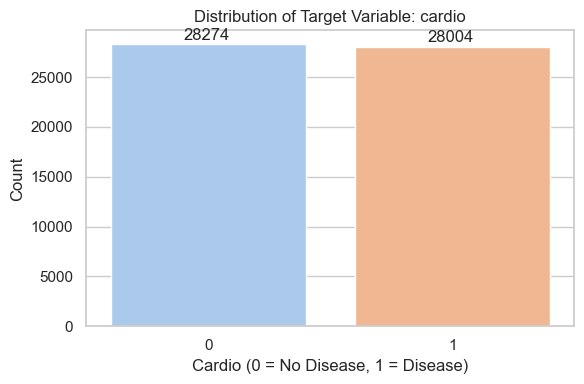

In [15]:
#check the distribution of the target variale 
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Apply a consistent style
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=model_df, palette='pastel')

# Add labels and title
plt.title('Distribution of Target Variable: cardio')
plt.xlabel('Cardio (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')

# Annotate bars with counts
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(f'{count}', (p.get_x() + 0.3, p.get_height() + 500))

plt.tight_layout()
plt.show()

#quite good balanced 

### Exploration of Gender Distribution

In [16]:
# Ensure model_df is a proper copy
model_df = model_df.copy()

# Fix gender mapping before analysis
# Original coding: 1 = Female, 2 = Male
# Desired coding: 0 = Female, 1 = Male
model_df.loc[:, 'gender'] = model_df['gender'].map({1: 0, 2: 1})

C:\Users\patri\AppData\Local\Temp\ipykernel_26704\3598703551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=model_df, palette='coolwarm')


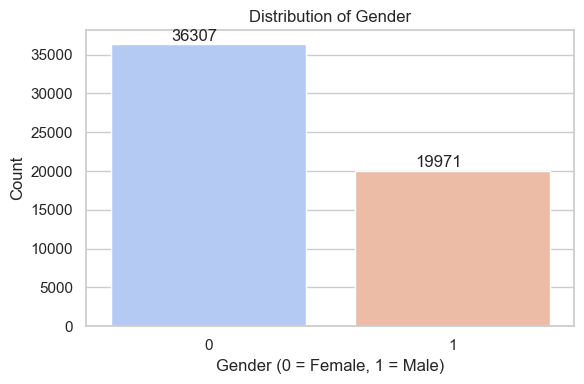

Gender distribution (%):
gender
0    64.5
1    35.5
Name: proportion, dtype: float64


In [17]:
# Check the gender distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=model_df, palette='coolwarm')

# Titles and labels
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')

# Annotate bar counts
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(f'{count}', (p.get_x() + 0.25, p.get_height() + 500))

plt.tight_layout()
plt.show()

# Print gender percentages
gender_percent = model_df['gender'].value_counts(normalize=True).round(3) * 100
print("Gender distribution (%):")
print(gender_percent.sort_index())  # 0 = female, 1 = male

### Dataset Creation for our Experiments in context of Bias-detection:

With the following three dataset compositions:

1. **Male-skewed (75/25)** — more **men** than **women**.
2. **Female-skewed (75/25)** — more **women** than **men**.
3. **Balanced (50/50)** — equal numbers of **men** and **women**.

In [18]:
# Save the preprocessed DataFrame to CSV
model_df.to_csv('OriginalPreprocessedBhatt_KaggleDataset.csv', index=False)

In [19]:
# Counts by gender (0=female, 1=male)
model_df['gender'].value_counts().sort_index()

gender
0    36307
1    19971
Name: count, dtype: int64

In [20]:
model_df.groupby(['gender', 'cardio']).size()

gender  cardio
0       0         18067
        1         18240
1       0         10207
        1          9764
dtype: int64

In [21]:
model_df.groupby('gender')['cardio'].value_counts(normalize=True).unstack()

cardio,0,1
gender,,
0,0.497618,0.502382
1,0.511091,0.488909


In [22]:
model_df.head()

,gender,age,bmiclass,MAP,cholesterol,gluc,smoke,alco,active,cardio
0,1,4,1,3,1,1,0,0,1,0
1,0,5,4,4,3,1,0,0,1,1
2,0,4,1,3,3,1,0,0,0,1
3,1,3,2,5,1,1,0,0,1,1
4,0,3,1,1,1,1,0,0,0,0


In [23]:
# Train/Test split from ORIGINAL (cleaned) data 

from pathlib import Path
from sklearn.model_selection import train_test_split

TARGET = "cardio"
SENSITIVE = "gender"  # for summaries only

# 1) Separate features/target
X = model_df.drop(columns=[TARGET])
y = model_df[TARGET]

# 2) Split once (stratify on label)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# 3) Save to disk (freeze test set)
out_dir = Path("data_splits")
out_dir.mkdir(parents=True, exist_ok=True)

X_train.to_csv(out_dir / "X_train.csv", index=False)
y_train.to_frame(name=TARGET).to_csv(out_dir / "y_train.csv", index=False)
X_test.to_csv(out_dir / "X_test.csv", index=False)
y_test.to_frame(name=TARGET).to_csv(out_dir / "y_test.csv", index=False)

print("Saved splits to:", out_dir.resolve())

# 4) Sanity summaries
def summarize_split(Xp, yp, name):
    print(f"\n=== {name} ===")
    print("Size:", len(yp))
    print("Outcome distribution:")
    print(yp.value_counts().rename({0:"NoDisease(0)", 1:"Disease(1)"}))
    if SENSITIVE in Xp.columns:
        print("\nGender distribution:")
        print(Xp[SENSITIVE].map({0:"Female",1:"Male"}).value_counts())
        print("\nOutcome by gender:")
        print(pd.crosstab(Xp[SENSITIVE].map({0:"Female",1:"Male"}), yp,
                          rownames=[SENSITIVE], colnames=[TARGET]))

summarize_split(X_train, y_train, "TRAIN")
summarize_split(X_test, y_test, "TEST")

# 5) Optional: exact-duplicate leakage check (should be zero)
def hashed_rows(df_part: pd.DataFrame) -> pd.Series:
    # hash rows as strings to detect exact duplicates across splits
    return pd.util.hash_pandas_object(df_part.astype(str), index=False)

leak = len(set(hashed_rows(X_train)) & set(hashed_rows(X_test)))
print(f"\nExact duplicate rows across TRAIN and TEST: {leak}  (expected: 0)")

Saved splits to: D:\DigiEcon\MasterThesis\Technical Implementation\Code Files\Cardiovascular disease dataset_Kaggle\data_splits

=== TRAIN ===
Size: 45022
Outcome distribution:
cardio
NoDisease(0)    22619
Disease(1)      22403
Name: count, dtype: int64

Gender distribution:
gender
Female    28945
Male      16077
Name: count, dtype: int64

Outcome by gender:
cardio      0      1
gender              
Female  14389  14556
Male     8230   7847

=== TEST ===
Size: 11256
Outcome distribution:
cardio
NoDisease(0)    5655
Disease(1)      5601
Name: count, dtype: int64

Gender distribution:
gender
Female    7362
Male      3894
Name: count, dtype: int64

Outcome by gender:
cardio     0     1
gender            
Female  3678  3684
Male    1977  1917

Exact duplicate rows across TRAIN and TEST: 1857  (expected: 0)


While the leakage check revealed 1,857 duplicate rows in both the training and testing sets, these were not actual duplicates. Instead, they were cases of identical features introduced by the aggregation of continuous variables (e.g., age, BMI, MAP). As individuals with identical feature profiles can have different outcomes, these overlaps do not represent data leakage. Therefore, it is appropriate to proceed with the current training/testing split.

In [26]:
import pandas as pd
import numpy as np
from pathlib import Path

in_dir = Path("data_splits")
X_train = pd.read_csv(in_dir / "X_train.csv")
y_train = pd.read_csv(in_dir / "y_train.csv")

# Ensure y aligns (optional sanity check)
assert len(X_train) == len(y_train), "X_train and y_train length mismatch."
train_pool = X_train.copy()
train_pool["cardio"] = y_train["cardio"].values  # force positional alignment

TARGET = "cardio"
SENSITIVE = "gender"  # 1=Male, 0=Female

# add provenance id
train_pool = train_pool.reset_index().rename(columns={"index": "source_id"})

def create_balanced_dataset(df, total_size=30000, male_ratio=0.5, seed=42, diagnostics=True):
    rng = np.random.default_rng(seed)

    # 1) balance outcomes globally
    n_total = total_size
    n_pos = n_total // 2
    n_neg = n_total - n_pos

    pos = df[df[TARGET] == 1]
    neg = df[df[TARGET] == 0]

    # 2) target gender counts within each outcome
    n_pos_male = int(round(n_pos * male_ratio))
    n_pos_female = n_pos - n_pos_male
    n_neg_male = int(round(n_neg * male_ratio))
    n_neg_female = n_neg - n_neg_male

    plan = [
        (pos, 1, n_pos_male, n_pos_female),
        (neg, 0, n_neg_male, n_neg_female),
    ]

    samples = []
    oversample_report = []
    for subset, yv, n_m, n_f in plan:
        males = subset[subset[SENSITIVE] == 1]
        females = subset[subset[SENSITIVE] == 0]

        # empty stratum guard
        if n_m > 0 and len(males) == 0:
            raise ValueError(f"No male samples available for y={yv}, but need {n_m}. Reduce total_size or relax ratios.")
        if n_f > 0 and len(females) == 0:
            raise ValueError(f"No female samples available for y={yv}, but need {n_f}. Reduce total_size or relax ratios.")

        repM = len(males) < n_m
        repF = len(females) < n_f

        takeM = males.sample(n=n_m, replace=repM, random_state=seed)
        takeF = females.sample(n=n_f, replace=repF, random_state=seed+1)

        samples.extend([takeM, takeF])

        if diagnostics:
            if n_m > 0:
                oversample_report.append(("y="+str(yv),"M", len(males), n_m, repM))
            if n_f > 0:
                oversample_report.append(("y="+str(yv),"F", len(females), n_f, repF))

    df_balanced = pd.concat(samples).sample(frac=1, random_state=seed).reset_index(drop=True)

    if diagnostics:
        # duplication rate
        dup_rate = 1 - df_balanced["source_id"].nunique() / len(df_balanced)
        print(f"[Diag] Duplication rate: {dup_rate:.3f}")
        for ylab, g, avail, need, rep in oversample_report:
            print(f"[Diag] {ylab} {g}: have {avail}, need {need}, oversample={rep}")

        # quick checks
        print(df_balanced[SENSITIVE].value_counts())
        print(df_balanced[TARGET].value_counts())
        print(df_balanced.groupby([SENSITIVE, TARGET]).size())

    return df_balanced

#Build datasets (use different seeds for variety)
datasets = {
    "50_50":   create_balanced_dataset(train_pool, total_size=30000, male_ratio=0.50, seed=10),
    "75M_25F": create_balanced_dataset(train_pool, total_size=30000, male_ratio=0.75, seed=11),
    "25M_75F": create_balanced_dataset(train_pool, total_size=30000, male_ratio=0.25, seed=12),
}

out_dir = Path("data_subsets")
out_dir.mkdir(parents=True, exist_ok=True)
for name, dataset in datasets.items():
    dataset.to_csv(out_dir / f"train_{name}.csv", index=False)
    print(f"Saved {name} subset with shape {dataset.shape} to {out_dir/f'train_{name}.csv'}")

[Diag] Duplication rate: 0.000
[Diag] y=1 M: have 7847, need 7500, oversample=False
[Diag] y=1 F: have 14556, need 7500, oversample=False
[Diag] y=0 M: have 8230, need 7500, oversample=False
[Diag] y=0 F: have 14389, need 7500, oversample=False
gender
1    15000
0    15000
Name: count, dtype: int64
cardio
0    15000
1    15000
Name: count, dtype: int64
gender  cardio
0       0         7500
        1         7500
1       0         7500
        1         7500
dtype: int64
[Diag] Duplication rate: 0.346
[Diag] y=1 M: have 7847, need 11250, oversample=True
[Diag] y=1 F: have 14556, need 3750, oversample=False
[Diag] y=0 M: have 8230, need 11250, oversample=True
[Diag] y=0 F: have 14389, need 3750, oversample=False
gender
1    22500
0     7500
Name: count, dtype: int64
cardio
0    15000
1    15000
Name: count, dtype: int64
gender  cardio
0       0          3750
        1          3750
1       0         11250
        1         11250
dtype: int64
[Diag] Duplication rate: 0.000
[Diag] y=1 M: h